In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score



In [2]:
!gdown 1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp

Downloading...
From: https://drive.google.com/uc?id=1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp
To: /content/Problem3.csv
100% 37.4k/37.4k [00:00<00:00, 27.5MB/s]


In [3]:
dataset_path = '/content/Problem3.csv'
data_df = pd.read_csv(dataset_path)
data_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,4.468204,26.2,94.3,1.808289,8.2,51,6.7,False,0.000000
1,7,4,oct,tue,4.517431,35.4,669.1,2.041220,18.0,33,0.9,False,0.000000
2,7,4,oct,sat,4.517431,43.7,686.9,2.041220,14.6,33,1.3,False,0.000000
3,8,6,mar,fri,4.529368,33.3,77.5,2.302585,8.3,97,4.0,True,0.000000
4,8,6,mar,sun,4.503137,51.3,102.2,2.360854,11.4,99,1.8,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4,3,aug,sun,4.414010,56.7,665.6,1.064711,27.8,32,2.7,False,2.006871
506,2,4,aug,sun,4.414010,56.7,665.6,1.064711,21.9,71,5.8,False,4.012592
507,7,4,aug,sun,4.414010,56.7,665.6,1.064711,21.2,70,6.7,False,2.498152
508,1,4,aug,sat,4.558079,146.0,614.7,2.509599,25.6,42,4.0,False,0.000000


In [4]:
categorical_cols = data_df.select_dtypes(include=['object', 'bool']).columns.to_list()
categorical_cols

['month', 'day', 'rain']

In [5]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(data_df[categorical_cols])

for col_name in categorical_cols :
  n_categories = data_df[col_name].nunique()
  print(f'Number of categories in { col_name }: { n_categories }')

encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols,
    columns=categorical_cols
)

numerical_df = data_df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)



Number of categories in month: 12
Number of categories in day: 7
Number of categories in rain: 2


In [6]:
data_df[categorical_cols]

,month,day,rain
0,mar,fri,False
1,oct,tue,False
2,oct,sat,False
3,mar,fri,True
4,mar,sun,False
...,...,...,...
505,aug,sun,False
506,aug,sun,False
507,aug,sun,False
508,aug,sat,False


In [7]:
X = encoded_df.drop(columns=['area'])
y = encoded_df['area']

In [8]:
X_train, X_test, y_train, y_test = train_test_split (X, y,
  test_size =0.3,
  random_state =7
)

In [9]:
xg_reg = xgb.XGBRegressor(
    seed=7,
    learning_rate=0.01,
    n_estimators=102,
    max_depth=3
)

xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=102, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
preds = xg_reg.predict(X_test)

<Figure size 20000x10000 with 0 Axes>

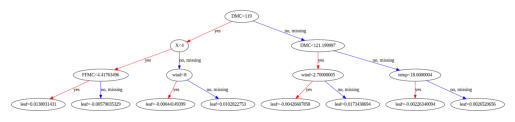

In [22]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plt.figure(figsize=(200, 100))
plot_tree(xg_reg, num_trees=10)
plt.show()


In [12]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

In [13]:
print(mae, mse)

1.1484401341167767 1.8845074196256495


In [14]:
!gdown 1pVdH-2b_odeuEPdXbLQYDcHXxgqqBK4i

Downloading...
From: https://drive.google.com/uc?id=1pVdH-2b_odeuEPdXbLQYDcHXxgqqBK4i
To: /content/Problem4.csv
100% 12.3k/12.3k [00:00<00:00, 25.0MB/s]


In [15]:
dataset_path = '/content/Problem4.csv'
data_df = pd.read_csv(dataset_path)
data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [16]:
X , y = data_df.iloc[:, :-1], data_df.iloc[:, -1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split (X, y,
  test_size =0.3,
  random_state =7
)

In [18]:
xg_class = xgb.XGBClassifier(seed=7)

xg_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
preds = xg_class.predict(X_test)
preds

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [20]:
train_acc = accuracy_score(y_train, xg_class.predict(X_train))
test_acc = accuracy_score(y_test, preds)
print(train_acc, test_acc)

1.0 0.9629629629629629
